In [52]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

import matplotlib.pyplot as plt  # To visualize
import json
from collections import Counter, defaultdict
from itertools import chain
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings('ignore')

from itertools import chain
import scipy.stats

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [53]:
from collections import defaultdict

In [78]:

df = pd.read_csv("../data/aff+conc/phone_aff_conc_features_num.csv")

In [208]:
d = df.groupby("COLEX").size().sort_values(ascending=False).to_dict()

In [209]:
d

{'fool~idiot': 152,
 'idiot~stupid': 146,
 'fool~stupid': 146,
 'fool~simpleton': 137,
 'simpleton~stupid': 133,
 'idiot~simpleton': 132,
 'female~woman': 100,
 'dwelling~house': 88,
 'husband~spouse': 86,
 'jail~prison': 80,
 'disease~illness': 77,
 'animation~life': 73,
 'employment~occupation': 71,
 'shade~shadow': 70,
 'door~doorway': 68,
 'dad~father': 67,
 'boutique~shop': 63,
 'ale~beer': 63,
 'retail~shop': 63,
 'boutique~retail': 62,
 'king~sovereign': 62,
 'apparel~clothing': 62,
 'homosexual~homosexuality': 61,
 'city~township': 61,
 'dimwit~stupid': 60,
 'curious~strange': 60,
 'stupid~unintelligent': 60,
 'prostitute~streetwalker': 59,
 'command~order': 59,
 'falsehood~lie': 58,
 'language~tongue': 58,
 'bloomers~trouser': 57,
 'answer~react': 56,
 'company~corporation': 55,
 'god~deity': 55,
 'chump~fool': 54,
 'dunce~stupid': 54,
 'coffee~coffee_bean': 54,
 'abhorrence~antipathy': 53,
 'beverage~drink': 53,
 'company~firm': 53,
 'cock~penis': 53,
 'aircraft~airplane': 52

In [210]:
df[df["COLEX"]=="fool~idiot"]

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,NORM_PRON,INIT_NORM_PRON,INIT_PRON,init_syl,init_son,init_cons,init_cont,init_delrel,init_lat,init_nas,init_strid,init_voi,init_sg,init_cg,init_ant,init_cor,init_distr,init_lab,init_hi,init_lo,init_back,init_round,init_velaric,init_tense,init_long,init_hitone,init_hireg,syl,son,cons,cont,delrel,lat,nas,strid,voi,sg,cg,ant,cor,distr,lab,hi,lo,back,round,velaric,tense,long,hitone,hireg,last_syl,last_son,last_cons,last_cont,last_delrel,last_lat,last_nas,last_strid,last_voi,last_sg,last_cg,last_ant,last_cor,last_distr,last_lab,last_hi,last_lo,last_back,last_round,last_velaric,last_tense,last_long,last_hitone,last_hireg,SEG_LEN
1346,abruti,fra,a b ʁ y t i,fool~idiot,3.255,1.415,3.295,1.95,4.855,2.445,3.57,2.175,3.906667,0.542537,abRyti,a,a,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,1,-1,-1,-1,1,-1,0,0,3,3,3,4,0,0,0,0,5,0,0,2,1,0,2,2,1,1,1,0,3,0,0,0,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,1,-1,-1,-1,-1,1,-1,0,0,6
5553,ahmak,tur,ɑ h m ɑ k,fool~idiot,3.255,1.415,3.295,1.95,4.855,2.445,3.57,2.175,3.906667,0.542537,ahmak,a,ɑ,1,1,-1,1,0,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,1,1,-1,-1,1,-1,0,0,2,4,3,3,0,0,1,0,3,0,0,1,0,0,1,1,2,3,0,0,2,0,0,0,-1,-1,1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,0,-1,1,-1,1,-1,-1,0,-1,0,0,5
7335,allocco,ita,a l l ɔ k k o,fool~idiot,3.255,1.415,3.295,1.95,4.855,2.445,3.57,2.175,3.906667,0.542537,allokko,a,a,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,1,-1,-1,-1,1,-1,0,0,3,5,4,5,0,2,0,0,5,0,0,2,2,0,0,2,1,4,2,0,2,0,0,0,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,-1,1,1,-1,1,-1,0,0,7
7898,amadán,gle,ɑ mˠ ə d̪ˠ ɑː nˠ,fool~idiot,3.255,1.415,3.295,1.95,4.855,2.445,3.57,2.175,3.906667,0.542537,amGdGanG,a,ɑ,1,1,-1,1,0,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,1,1,-1,-1,1,-1,0,0,3,5,3,3,0,0,2,0,6,0,0,3,2,1,1,3,2,6,0,0,2,1,0,0,-1,1,1,-1,-1,-1,1,0,1,-1,-1,1,1,-1,-1,1,-1,1,-1,-1,0,-1,0,0,6
9260,andouille,fra,ɑ̃ d u j,fool~idiot,3.255,1.415,3.295,1.95,4.855,2.445,3.57,2.175,3.906667,0.542537,aduj,a,ɑ,1,1,-1,1,0,-1,1,0,1,-1,-1,0,-1,0,-1,-1,1,1,-1,-1,1,-1,0,0,2,3,1,3,0,0,1,0,4,0,0,1,1,0,1,2,1,2,1,0,2,0,0,0,-1,1,-1,1,-1,-1,-1,0,1,-1,-1,-1,-1,0,-1,1,-1,-1,-1,-1,0,-1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331192,등신,kor,t ɯː ŋ ɕʰ i n,fool~idiot,3.255,1.415,3.295,1.95,4.855,2.445,3.57,2.175,3.906667,0.542537,tWNGchin,t,t,-1,-1,1,-1,-1,-1,-1,0,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,0,-1,0,0,2,4,4,3,1,0,2,0,4,1,0,2,3,1,0,4,0,2,0,0,1,1,0,0,-1,1,1,-1,-1,-1,1,0,1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,0,-1,0,0,6
331707,멍청이,kor,m ʌ̹ ŋ t͡ɕʰ ʌ̹ ŋ i,fool~idiot,3.255,1.415,3.295,1.95,4.855,2.445,3.57,2.175,3.906667,0.542537,mNGtchNGi,m,m,-1,1,1,-1,-1,-1,1,0,1,-1,-1,1,-1,0,1,-1,-1,-1,-1,-1,0,-1,0,0,3,6,4,3,1,0,3,0,6,1,0,1,1,1,1,4,0,4,0,0,3,0,0,0,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,1,-1,-1,-1,-1,1,-1,0,0,7
331987,무대,kor,m uː d ɛ,fool~idiot,3.255,1.415,3.295,1.95,4.855,2.445,3.57,2.175,3.906667,0.542537,mude,m,m,-1,1,1,-1,-1,-1,1,0,1,-1,-1,1,-1,0,1,-1,-1,-1,-1,-1,0,-1,0,0,2,3,2,2,0,0,1,0,4,0,0,2,1,0,2,1,0,1,1,0,1,1,0,0,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,0,0,4
332500,바보,kor,p a̠ː b o̞,fool~idiot,3.255,1.415,3.295,1.95,4.855,2.445,3.57,2.175,3.906667,0.542537,pabo,p,p,-1,-1,1,-1,-1,-1,-1,0,-1,-1,-1,1,-1,0,1,-1,-1,-1,-1,-1,0,-1,0,0,2,2,2,2,0,0,0,0,3,0,0,2,0,0,2,0,1,1,1,0,2,0,0,0,1,1,-1,1,-1,-1,-1,0,1,-1,-1,0,-1,0,-1,-1,-1,1,1,-1,1,-1,0,0,4


In [81]:
langs_df = list(set(df["LANG_PRON"].to_list()))

In [79]:
stats_dict=defaultdict(dict)

In [82]:
len(' ')

1

In [84]:
for lang in langs_df:
    df_lang= df[df["LANG_PRON"]==lang]
    prons = list(set(chain.from_iterable([x.split(" ") for x in df_lang["PRON"].tolist()])))
    stats_dict[lang]=(len(df_lang), len(prons))

In [85]:
stats_dict

defaultdict(dict,
            {'enm': (14, 27),
             'ind': (21415, 56),
             'tur': (2584, 94),
             'hin': (3326, 80),
             'bcl': (1, 3),
             'got': (8, 21),
             'hye': (452, 39),
             'mdf': (1, 2),
             'ukr': (1332, 65),
             'new': (2, 4),
             'jpn': (1842, 74),
             'bod': (5, 21),
             'gle': (21739, 104),
             'rus': (3914, 79),
             'mal': (15, 31),
             'kik': (1, 6),
             'ltz': (50, 43),
             'haw': (23, 15),
             'ina': (10, 18),
             'bre': (60, 42),
             'abk': (1, 3),
             'nld': (12801, 70),
             'mya': (122, 59),
             'nor': (509, 60),
             'msa': (11009, 59),
             'cmn': (8647, 74),
             'glg': (2136, 52),
             'lao': (34, 40),
             'cop': (2, 7),
             'ady': (1, 5),
             'tgl': (1608, 39),
             'deu': (6796, 85),
    

In [33]:
df[df["LANG_PRON"]=="arb"]

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,NORM_PRON,INIT_NORM_PRON,INIT_PRON,init_syl,init_son,init_cons,init_cont,init_delrel,init_lat,init_nas,init_strid,init_voi,init_sg,init_cg,init_ant,init_cor,init_distr,init_lab,init_hi,init_lo,init_back,init_round,init_velaric,init_tense,init_long,init_hitone,init_hireg,syl,son,cons,cont,delrel,lat,nas,strid,voi,sg,cg,ant,cor,distr,lab,hi,lo,back,round,velaric,tense,long,hitone,hireg,last_syl,last_son,last_cons,last_cont,last_delrel,last_lat,last_nas,last_strid,last_voi,last_sg,last_cg,last_ant,last_cor,last_distr,last_lab,last_hi,last_lo,last_back,last_round,last_velaric,last_tense,last_long,last_hitone,last_hireg,SEG_LEN


In [52]:
df_langs = pd.read_csv("../data/languages/languages_and_dialects_geo.csv")

In [43]:
df_langs[df_langs["isocodes"]=="kxd"]

,glottocode,name,isocodes,level,macroarea,latitude,longitude
2585,brun1242,Brunei,kxd,language,Papunesia,4.456045,114.429505


In [8]:
df_langs[df_langs["glottocode"]=="arab1395"]

,glottocode,name,isocodes,level,macroarea,latitude,longitude


In [57]:
langs = list(set(df["LANG_PRON"].to_list()))

In [11]:
stats_dict= defaultdict(dict)

In [17]:
d = set(langs).difference(set(df_langs["isocodes"].tolist()))

In [47]:
len(langs)

142

In [45]:
ara_dict={"ara":["arq", "aao", "xaa", "bbz", "abv", "shu", "acy", "adf", "avl", "arz", "afb", "ayh", "mey", "acw", "ayl", "ars", "apc", "ayp", "acx", "aec", "ssh", "sqr", "arb", "apd", "pga", "acq", "abh"]} # 10258
aze_dict={"aze":["azj", "azb"]}
est_dict= {"est":["ekk", "vro"]}
fas_dict={"fas":["pes", "prs", "tqk", "aiq", "bhh", "haz", "jpr", "phv", "deh", "jdt", "ttt"]}
pus_dict={"pus":["pst", "pbu", "pbt", "wne"]}
yid_dict={"yid":["yih", "ydd"]}
nep_dict={"nep":["npi"]}
ori_dict={"ori":["ory", "spv","ort","dso"]}
mon_dict={"mon":["khk", "mvf"]}
sqi_dict={"sqi":["aae", "aat", "aln", "als"]}
msa_dict={"msa":["zlm", "kxd", "ind", "zsm", "jax", "meo", "kvr", "xmm", "min", "mui", "zmi", "max", "mfa", "coa", "bjn", "bew", "msi", "mqg" ]}

In [71]:
langs_extra = []
langs_dict={}
for k, v in ara_dict.items():
    for l in v:
        langs_extra.append(l)
        langs_dict[l]=k
for k, v in aze_dict.items():
    for l in v:
        langs_extra.append(l)
        langs_dict[l]=k
        
for k, v in est_dict.items():
    for l in v:
        langs_extra.append(l)
        langs_dict[l]=k
        
for k, v in fas_dict.items():
    for l in v:
        langs_extra.append(l)
        langs_dict[l]=k
        
for k, v in pus_dict.items():
    for l in v:
        langs_extra.append(l)
        langs_dict[l]=k
        
for k, v in yid_dict.items():
    for l in v:
        langs_extra.append(l)
        langs_dict[l]=k
    
for k, v in nep_dict.items():
    for l in v:
        langs_extra.append(l)
        langs_dict[l]=k
        
for k, v in ori_dict.items():
    for l in v:
        langs_extra.append(l)
        langs_dict[l]=k
        
for k, v in mon_dict.items():
    for l in v:
        langs_extra.append(l)
        langs_dict[l]=k
        
    
for k, v in sqi_dict.items():
    for l in v:
        langs_extra.append(l)
        langs_dict[l]=k
        
for k, v in msa_dict.items():
    for l in v:
        langs_extra.append(l)
        langs_dict[l]=k

In [72]:
len(langs_extra)

77

In [73]:
langs = list(set(langs_extra+langs))
len(langs)

218

In [59]:
df_inter = df_langs[df_langs["isocodes"].isin(langs)]

In [76]:
df_inter["higher_lang"]= df_inter["isocodes"].apply(lambda x: langs_dict.get(x, x))

In [86]:
df_inter["#Phonemes"] = df_inter["higher_lang"].apply(lambda x: stats_dict[x][1])

In [87]:
df_inter["#Concepts"] = df_inter["higher_lang"].apply(lambda x: stats_dict[x][0])

In [197]:
df_inter[df_inter["macroarea"]=="North America"]

,glottocode,name,isocodes,level,macroarea,latitude,longitude,higher_lang,#Phonemes,#Concepts
3628,clas1250,Classical Nahuatl,nci,language,North America,19.720000,-96.9700,nci,9,1
11767,mikm1235,Mi'kmaq,mic,language,North America,46.000000,-64.0000,mic,8,3
12685,nava1243,Navajo,nav,language,North America,36.330000,-109.3800,nav,29,11
15206,penn1240,Pennsylvania German,pdc,language,North America,40.030507,-76.3211,pdc,9,5


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [4]:
landmap = "../data/maps_gglot/ne_110m_land/ne_110m_land.shp"

In [5]:
land_map = gpd.read_file(landmap)

In [198]:
#df_inter.to_csv("../data/aff+conc/languages_#phone.csv", index=False)

In [6]:
dflang= pd.read_csv("../data/aff+conc/languages_#phone.csv")

In [7]:
dflang=dflang.drop_duplicates(subset=["higher_lang"])

In [8]:
dflang.head()

,glottocode,name,isocodes,level,macroarea,latitude,longitude,higher_lang,#Phonemes,#Concepts,Family
0,abkh1244,Abkhaz,abk,language,Eurasia,43.056218,41.159115,abk,3,1,Abkhaz-Adyge
1,adyg1241,Adyghe,ady,language,Eurasia,44.000000,39.330000,ady,5,1,Abkhaz-Adyge
2,afri1274,Afrikaans,afr,language,Africa,-22.000000,30.000000,afr,53,1014,Indo-European
3,aima1241,Aimaq,aiq,language,Eurasia,35.283000,59.175600,fas,78,5946,Indo-European
4,alge1239,Algerian Arabic,arq,language,Africa,35.420800,3.230330,ara,49,10258,Afro-Asiatic


In [57]:
crs = {'init':'epsg:4326'}

In [58]:
geometry = [Point(xy) for xy in zip(dflang['longitude'], dflang['latitude'])]

In [59]:
geo_df = gpd.GeoDataFrame(dflang, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

,glottocode,name,isocodes,level,macroarea,latitude,longitude,higher_lang,#Phonemes,#Concepts,Family,geometry
0,abkh1244,Abkhaz,abk,language,Eurasia,43.056218,41.159115,abk,3,1,Abkhaz-Adyge,POINT (41.15911 43.05622)
1,adyg1241,Adyghe,ady,language,Eurasia,44.000000,39.330000,ady,5,1,Abkhaz-Adyge,POINT (39.33000 44.00000)
2,afri1274,Afrikaans,afr,language,Africa,-22.000000,30.000000,afr,53,1014,Indo-European,POINT (30.00000 -22.00000)
3,aima1241,Aimaq,aiq,language,Eurasia,35.283000,59.175600,fas,78,5946,Indo-European,POINT (59.17560 35.28300)
4,alge1239,Algerian Arabic,arq,language,Africa,35.420800,3.230330,ara,49,10258,Afro-Asiatic,POINT (3.23033 35.42080)


In [60]:
geo_df["lang_diff"]= geo_df["isocodes"]!=geo_df["higher_lang"]

In [61]:
geo_df["markersize"]= (geo_df["#Concepts"]/geo_df["#Concepts"].sum())*10000

In [42]:
# lang2size = dict() # fas->makersize/N

# for idx, group in geo_df[geo_df["lang_diff"]==True].groupby("higher_lang"):
#     LEN = len(group)
#     makersize = group["markersize"].tolist()[0]
#     print(makersize, LEN)
#     lang2size[idx]=makersize/4                                                 

322.3090119585504 1
3.4248081793216993 1
5.40428446645259 1
186.824857194925 1
1.9794762871308904 1
345.90562611149164 1
0.31420258525887157 1
0.031420258525887146 1
0.06284051705177429 1
38.96112057210007 1
0.5027241364141943 1


In [15]:
# for lang, size in lang2size.items():
#     geo_df.loc["higher_lang":lang, "markersize"]=size

In [62]:
geo_df["markersize"]= [20  if x<20 else x for x in geo_df["markersize"].tolist()]

In [84]:
geo_df

,glottocode,name,isocodes,level,macroarea,latitude,longitude,higher_lang,#Phonemes,#Concepts,Family,geometry,lang_diff,markersize
0,abkh1244,Abkhaz,abk,language,Eurasia,43.056218,41.159115,abk,3,1,Abkhaz-Adyge,POINT (41.15911 43.05622),False,20.000000
1,adyg1241,Adyghe,ady,language,Eurasia,44.000000,39.330000,ady,5,1,Abkhaz-Adyge,POINT (39.33000 44.00000),False,20.000000
2,afri1274,Afrikaans,afr,language,Africa,-22.000000,30.000000,afr,53,1014,Indo-European,POINT (30.00000 -22.00000),False,31.860142
3,aima1241,Aimaq,aiq,language,Eurasia,35.283000,59.175600,fas,78,5946,Indo-European,POINT (59.17560 35.28300),True,186.824857
4,alge1239,Algerian Arabic,arq,language,Africa,35.420800,3.230330,ara,49,10258,Afro-Asiatic,POINT (3.23033 35.42080),True,322.309012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,wels1247,Welsh,cym,language,Eurasia,52.000000,-4.000000,cym,48,1753,Indo-European,POINT (-4.00000 52.00000),False,55.079713
198,west2354,Western Frisian,fry,language,Eurasia,53.143000,5.860910,fry,32,26,Indo-European,POINT (5.86091 53.14300),False,20.000000
200,xhos1239,Xhosa,xho,language,Africa,-31.038900,28.076900,xho,30,6,Atlantic-Congo,POINT (28.07690 -31.03890),False,20.000000
201,yoru1245,Yoruba,yor,language,Africa,7.153450,3.672250,yor,6,4,Atlantic-Congo,POINT (3.67225 7.15345),False,20.000000


In [63]:
fams = set(list(geo_df["Family"].tolist()))

In [64]:
families = ['Abkhaz-Adyge',
 'Afro-Asiatic',
 'Algic',
 'Artificial Language',
 'Athabaskan-Eyak-Tlingit',
 'Atlantic-Congo',
 'Austroasiatic',
 'Austronesian',
 'Dravidian',
 'Indo-European',
 'Japonic',
 'Kartvelian',
 'Koreanic',
 'Mongolic-Khitan',
 'Nakh-Daghestanian',
 'Sino-Tibetan',
 'Tai-Kadai',
 'Tungusic',
 'Turkic',
 'Uralic',
 'Uto-Aztecan']

In [65]:
len(families)

21

In [66]:
geo_df.head()

,glottocode,name,isocodes,level,macroarea,latitude,longitude,higher_lang,#Phonemes,#Concepts,Family,geometry,lang_diff,markersize
0,abkh1244,Abkhaz,abk,language,Eurasia,43.056218,41.159115,abk,3,1,Abkhaz-Adyge,POINT (41.15911 43.05622),False,20.000000
1,adyg1241,Adyghe,ady,language,Eurasia,44.000000,39.330000,ady,5,1,Abkhaz-Adyge,POINT (39.33000 44.00000),False,20.000000
2,afri1274,Afrikaans,afr,language,Africa,-22.000000,30.000000,afr,53,1014,Indo-European,POINT (30.00000 -22.00000),False,31.860142
3,aima1241,Aimaq,aiq,language,Eurasia,35.283000,59.175600,fas,78,5946,Indo-European,POINT (59.17560 35.28300),True,186.824857
4,alge1239,Algerian Arabic,arq,language,Africa,35.420800,3.230330,ara,49,10258,Afro-Asiatic,POINT (3.23033 35.42080),True,322.309012


In [67]:
from random import randint
colors = []
n = len(families)
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

In [81]:
geo_df= geo_df[geo_df["Family"]!="Artificial Language"]

In [82]:
geo_df.dropna(subset=["Family"], inplace=True)

Tungusic #A1706D
Austronesian #514AD3
Sino-Tibetan #3FA623
Uto-Aztecan #6D3051
Japonic #DC0C3B
Uralic #32D510
Mongolic-Khitan #E1C70B
Abkhaz-Adyge #BF97E8
Indo-European #983784
Dravidian #92259C
Nakh-Daghestanian #67ADF0
Atlantic-Congo #1C82FC
Austroasiatic #0A35D2
Koreanic #12D1C8
Athabaskan-Eyak-Tlingit #290C6A
Tai-Kadai #FFD33E
Afro-Asiatic #1393F9
Algic #94FC7B
Kartvelian #0F43B4
Turkic #691847


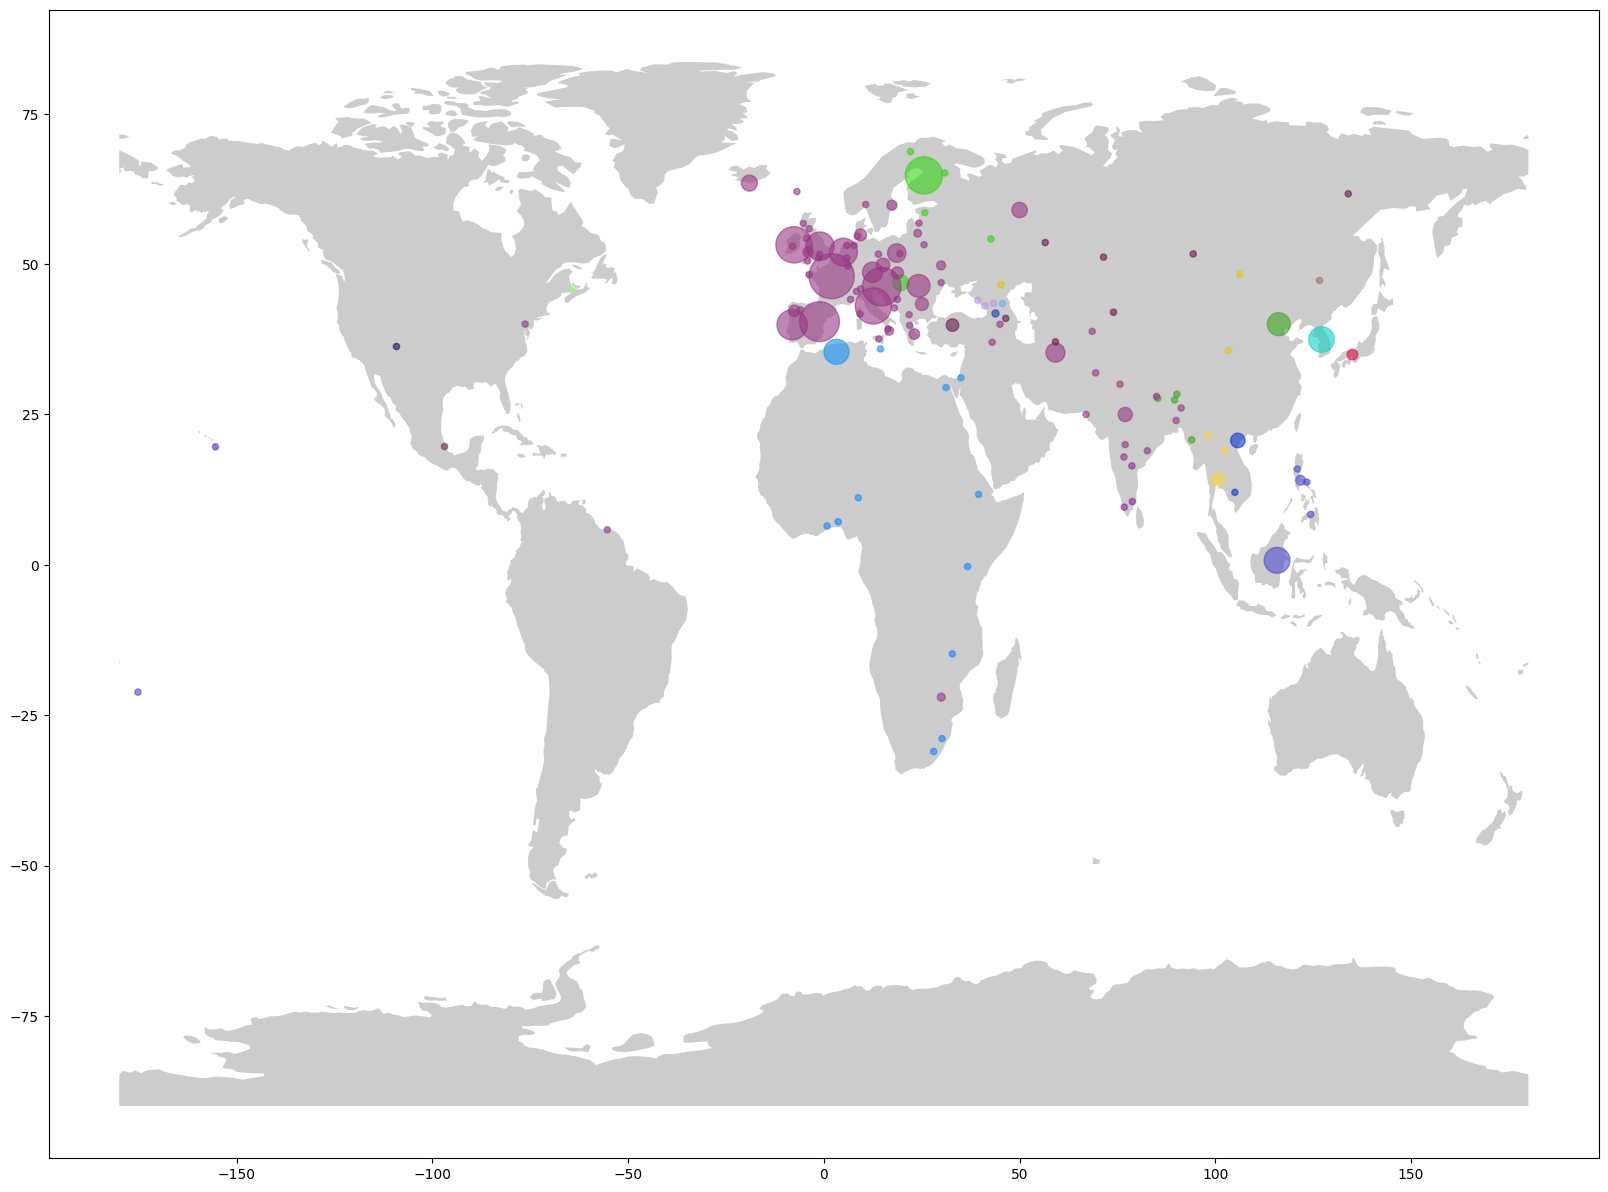

In [83]:
fig, ax = plt.subplots(figsize=(20,20))

base = land_map.plot(ax=ax, alpha=0.4, color='gray', legend=True )

for idx, macroarea in enumerate(list( set(list(geo_df["Family"].tolist())))):
    print(macroarea,colors[idx])
    ms= geo_df[geo_df["Family"]==macroarea]["markersize"].tolist()
    
    geo_df[geo_df["Family"]==macroarea].plot(ax=ax, markersize=ms, color=colors[idx], 
                                           marker='o', alpha=0.6,
                                           label= macroarea, legend=True,categorical=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
plt.savefig("map_fams.png")

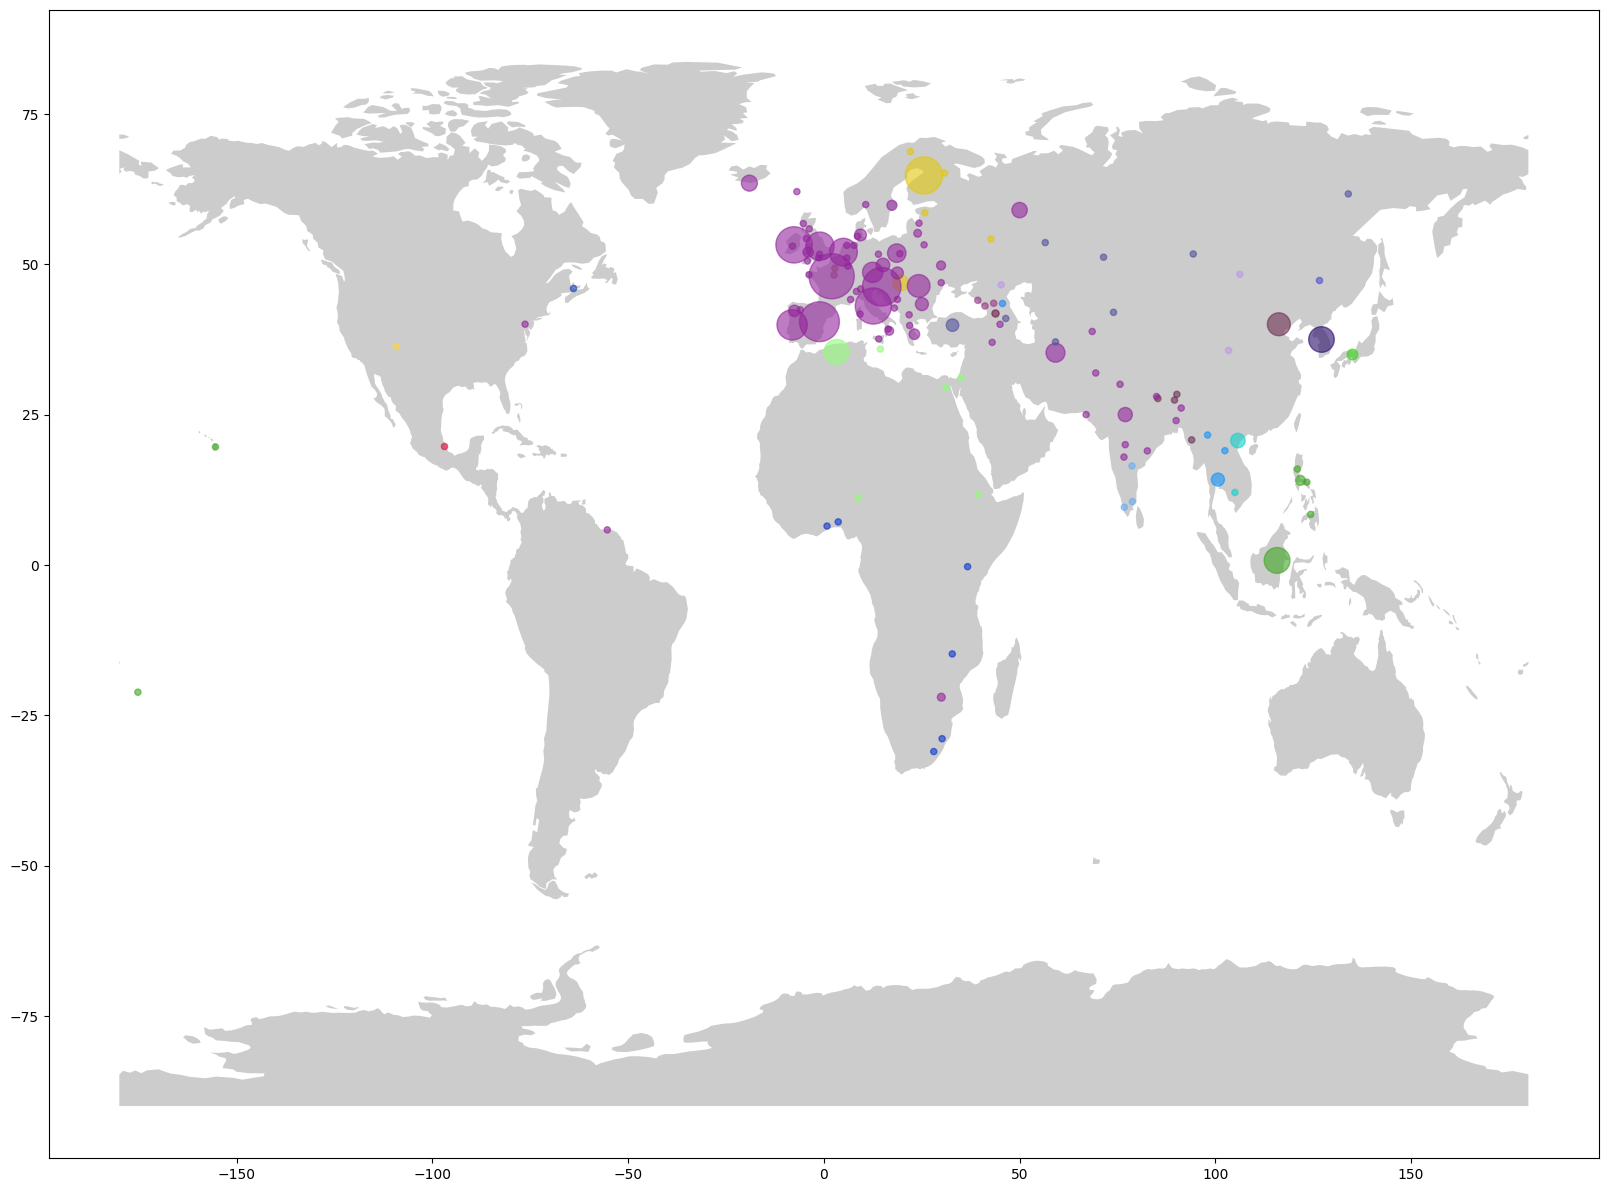

In [71]:
fig, ax = plt.subplots(figsize=(20,20))

land = land_map.plot(ax=ax, alpha=0.4, color="gray")
# geo_df.plot(ax=ax, markersize="markersize", cmap='rainbow', 
#                                            marker='o', alpha=0.6,
#                                            label= "Family", legend=True)

colors_dict={}
for idx, macroarea in enumerate(list( set(list(geo_df["Family"].tolist())))):
    colors_dict[macroarea]=colors[idx]
    ms= geo_df[geo_df["Family"]==macroarea]["markersize"].tolist()
    
    geo_df[geo_df["Family"]==macroarea].to_crs(epsg=4289).plot(ax=ax, markersize=ms, color=colors[idx], 
                                           marker='o', alpha=0.6,
                                           label= macroarea, legend=True)
    # ax.legend(        
    #         title="Legend",
    #         loc='lower left',
    #         ncol=1,
    #         shadow=True)

plt.savefig("map_families.png")

In [73]:
colors_dict

{'Artificial Language': '#A1706D',
 'Tungusic': '#514AD3',
 'Austronesian': '#3FA623',
 'Sino-Tibetan': '#6D3051',
 'Uto-Aztecan': '#DC0C3B',
 'Japonic': '#32D510',
 'Uralic': '#E1C70B',
 'Mongolic-Khitan': '#BF97E8',
 'Abkhaz-Adyge': '#983784',
 'Indo-European': '#92259C',
 'Dravidian': '#67ADF0',
 'Nakh-Daghestanian': '#1C82FC',
 'Atlantic-Congo': '#0A35D2',
 'Austroasiatic': '#12D1C8',
 'Koreanic': '#290C6A',
 'Athabaskan-Eyak-Tlingit': '#FFD33E',
 'Tai-Kadai': '#1393F9',
 'Afro-Asiatic': '#94FC7B',
 'Algic': '#0F43B4',
 'Kartvelian': '#691847',
 'Turkic': '#51519C'}

In [164]:
colors = ["#F3A505", "green", "#721422", "red", "blue"]

Eurasia #F3A505
South America green
Africa #721422
North America red
Papunesia blue


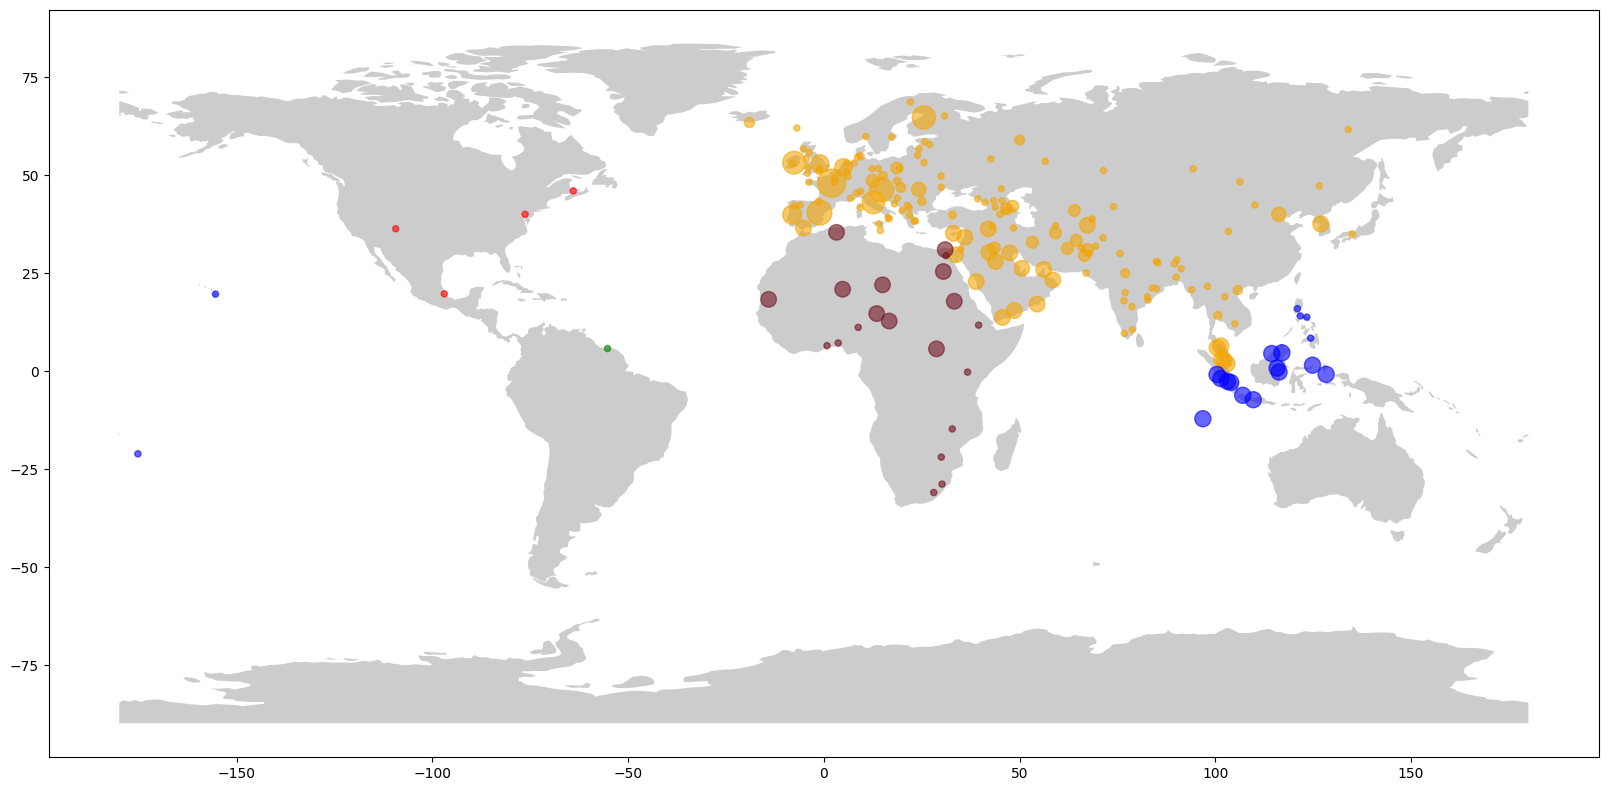

In [193]:
fig, ax = plt.subplots(figsize=(20,20))

base = land_map.plot(ax=ax, alpha=0.4, color='gray', legend=True )

for idx, macroarea in enumerate(list( set(list(geo_df["macroarea"].tolist())))):
    print(macroarea,colors[idx])
    ms= geo_df[geo_df["macroarea"]==macroarea]["markersize"].tolist()
    
    geo_df[geo_df["macroarea"]==macroarea].plot(ax=ax, markersize=ms, color=colors[idx], 
                                           marker='o', alpha=0.6,
                                           label= macroarea, legend=True,categorical=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
plt.savefig("map.png")